В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cars_df = pd.read_csv('drive/MyDrive/Colab Notebooks/cars.csv')

In [28]:
cars_df[:5]

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [5]:
cars_df.dtypes

,0
Car_ID,int64
Brand,object
Model,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,int64
Engine,int64


In [6]:
cars_df.info()  # Показує деталі, включаючи кількість значень


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [7]:
for col in cars_df.select_dtypes(include=['object']).columns:
    print(f"{col}: {cars_df[col].dropna().apply(type).unique()}")


Brand: [<class 'str'>]
Model: [<class 'str'>]
Fuel_Type: [<class 'str'>]
Transmission: [<class 'str'>]
Owner_Type: [<class 'str'>]


In [29]:
for col in cars_df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(cars_df[col].value_counts())  # Скільки значень у кожній категорії



Brand:
Brand
Ford          11
Tata          11
Hyundai       11
BMW           10
Toyota        10
Audi          10
Volkswagen    10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64

Model:
Model
Mustang          3
C-Class          3
Altroz           3
Verna            3
Passat           2
Thar             2
T-Roc            2
BR-V             2
S-Cross          2
Tigor            2
Santro           2
Ranger           2
Yaris            2
GLE              2
7 Series         2
A3               2
Ameo             2
WR-V             2
Vitara           2
Safari           2
Elantra          2
Aspire           2
Fortuner         2
E-Class          2
X3               2
A6               2
Venue            2
Tiago            2
XUV300           2
Vento            2
Q7               2
X5               2
GLA              2
Camry            2
A5               2
3 Series         2
Innova Crysta    2
EcoSport         2
5 Series         1
GLC              1

В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарна (має лише 2 значення)
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 1 колонка, в яких можна встановити відношення порядку (first>second>third)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [30]:
from sklearn.model_selection import train_test_split

X = cars_df.drop(columns=['Price', 'Car_ID'])
y = cars_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print(f"Тренувальний X: {X_train.shape}, Тестовий X: {X_test.shape}")
print(f"Тренувальний y: {y_train.shape}, Тестовий y: {y_test.shape}")


Тренувальний X: (80, 11), Тестовий X: (20, 11)
Тренувальний y: (80,), Тестовий y: (20,)


In [31]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])


In [32]:
Transmission = {'Automatic': 1, 'Manual': 0}
X_train['Transmission'] = X_train['Transmission'].map(Transmission)
X_test['Transmission'] = X_test['Transmission'].map(Transmission)

In [33]:
Fuel_Type = {'Petrol': 1, 'Diesel': 0}
X_train['Fuel_Type'] = X_train['Fuel_Type'].map(Fuel_Type)
X_test['Fuel_Type'] = X_test['Fuel_Type'].map(Fuel_Type)

In [34]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_train = encoder.fit_transform(X_train[['Brand']])
encoded_test = encoder.transform(X_test[['Brand']])

brand_columns = encoder.get_feature_names_out(['Brand'])
X_train = X_train.join(pd.DataFrame(encoded_train, columns=brand_columns, index=X_train.index))
X_test = X_test.join(pd.DataFrame(encoded_test, columns=brand_columns, index=X_test.index))

X_train.drop(columns=['Brand'], inplace=True)
X_test.drop(columns=['Brand'], inplace=True)

In [35]:
print(X_train['Model'].unique())
print(X_test['Model'].unique())


['T-Roc' 'A5' 'A6' 'Vento' 'GLC' 'C-Class' 'Q7' 'Altroz' 'A3' 'XUV300'
 'S-Cross' 'X3' 'Tiago' 'Mustang' 'Fortuner' 'GLE' 'Yaris' 'Ranger'
 'Innova' 'E-Class' 'Innova Crysta' 'Vitara' 'Ameo' 'WR-V' 'Tigor'
 'Santro' 'X5' 'Venue' 'Endeavour' '7 Series' 'BR-V' 'Civic' 'Elantra'
 'Sonata' '3 Series' 'Passat' 'EcoSport' 'Verna' 'Safari' '5 Series'
 'Aspire' 'Thar' 'Camry' 'Corolla' 'Harrier' 'Nexon' 'GLA' 'Swift'
 'Scorpio']
['Q3' 'Santro' 'Vento' 'Ertiga' 'Aspire' 'Elantra' 'Venue' 'City' 'Figo'
 'Verna' 'Creta' 'A4' 'Yaris' 'X1' 'Polo' 'Safari' 'Innova Crysta' 'Thar'
 'GLA' 'Tiguan']


In [36]:

model_dict = {model: 'Other' for model in cars_df['Model'].unique()}

groupings = {
    'Sedan': ['Camry', 'Corolla', 'Elantra', 'Civic', 'Verna', 'Vento', 'Passat', 'Yaris'],
    'SUV': ['Q7', 'X5', 'Harrier', 'Creta', 'Thar', 'Safari', 'Scorpio', 'XUV300'],
    'Hatchback': ['Swift', 'Polo', 'Tiago', 'Altroz', 'Tigor', 'Santro'],
    'Sport': ['Mustang', '3 Series', '5 Series', '7 Series'],
    'Luxury': ['C-Class', 'E-Class', 'A3', 'A4', 'A5', 'A6', 'Q3', 'GLA', 'GLC', 'GLE'],
    'MPV': ['Ertiga', 'Innova', 'Innova Crysta']
}

for category, models in groupings.items():
    model_dict.update({model: category for model in models})

X_train['Model'] = X_train['Model'].map(model_dict).fillna('Other')
X_test['Model'] = X_test['Model'].map(model_dict).fillna('Other')

model_encoding = {'Sedan': 0, 'SUV': 1, 'Hatchback': 2, 'Sport': 3, 'Luxury': 4, 'MPV': 5, 'Other': 6}
X_train['Model'] = X_train['Model'].map(model_encoding)
X_test['Model'] = X_test['Model'].map(model_encoding)


Очікуваний результат після трансформацій:

In [37]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Codes,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
83,6,2019,22000,1,1,Second,18,1498,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,4,2018,28000,0,1,First,17,1968,187,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,4,2018,28000,1,1,First,15,1984,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0,2017,32000,1,0,Second,18,1598,103,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,4,2017,26000,1,1,Second,12,1991,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Codes,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
17,4,2016,38000,1,1,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,2,2019,26000,1,0,Third,20,1086,68,5,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0,2017,32000,1,0,Second,18,1598,103,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,5,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,6,2019,26000,1,0,Third,20,1194,94,5,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [40]:
X_train_numeric = X_train.select_dtypes(include=['number'])


In [41]:
data_combined = pd.concat([X_train_numeric, y_train], axis=1)


In [43]:
correlation_matrix = data_combined.corr()


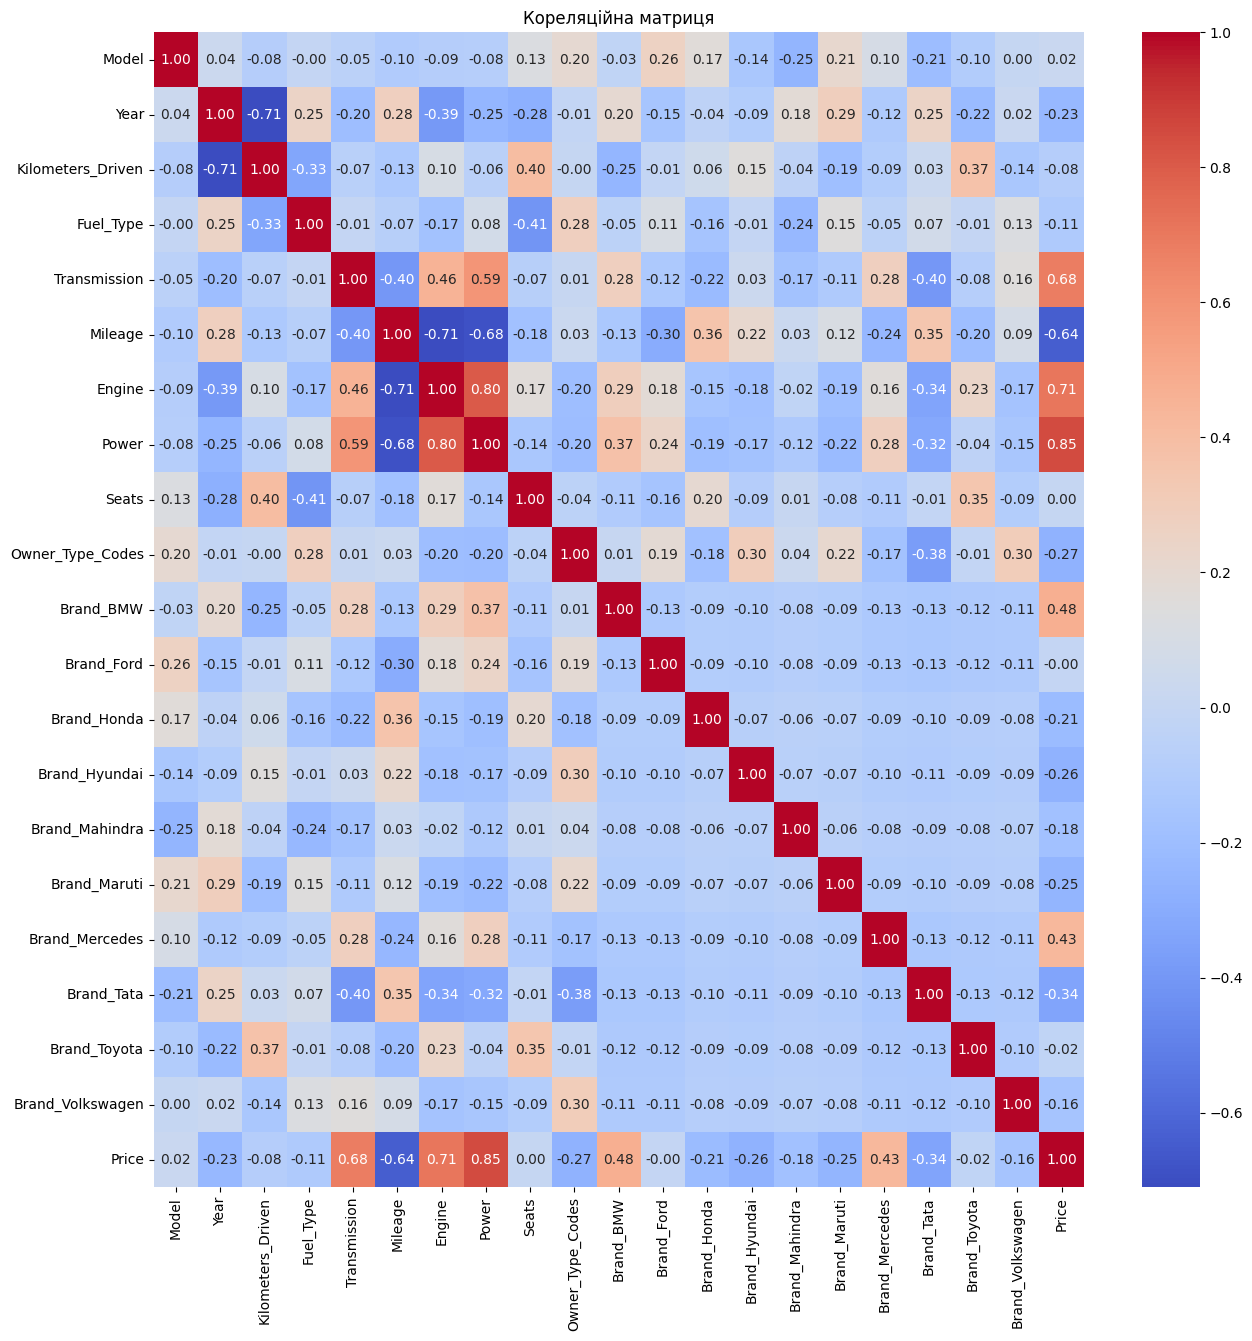

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()


Колонки,які найбільш корелюють з цільовою колонкою Price на більше ніж 0.5 :\

1.   Transmissin 0.68
2.   Mileage -0.64
3.   Engine 0.71
4.   Power 0.85



**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [47]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("Коефіцієнти:", model.coef_)
print("Перехоплення:", model.intercept_)


Коефіцієнти: [ 2.02002705e+04 -1.60740850e+04 -1.06902702e+01 -3.57011623e+05
  2.40043539e+05 -3.47098369e+04 -2.80563418e+01  6.28186757e+03
 -8.85318823e+03  5.31887666e+04 -2.58780317e+04 -1.08980568e+06
 -9.72322592e+05 -1.22931519e+06 -1.25730716e+06 -1.16209106e+06
 -3.96748613e+04 -8.54187242e+05 -6.02939189e+05 -1.00076423e+06]
Перехоплення: 34676035.84706728


In [49]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("RMSE для тренувального набору:", train_rmse)
print("RMSE для тестового набору:", test_rmse)


RMSE для тренувального набору: 207583.01932579066
RMSE для тестового набору: 257842.387722643


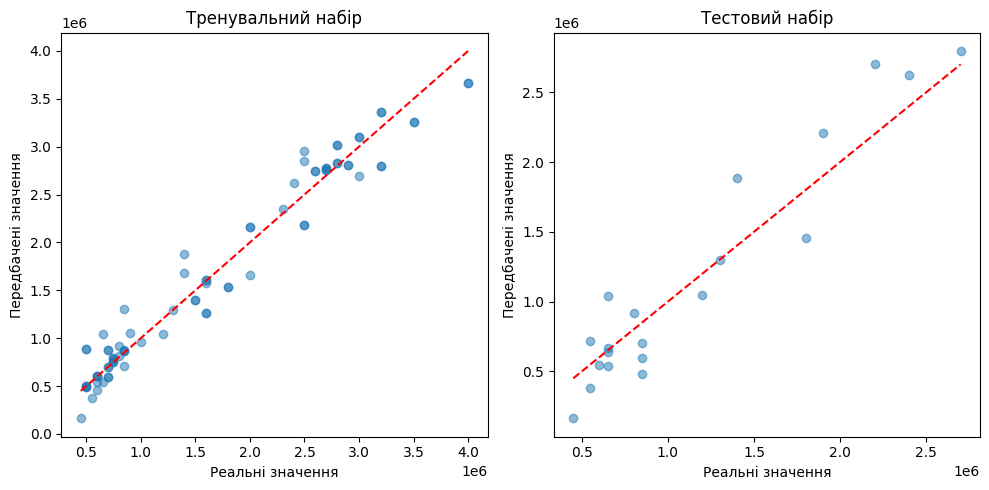

In [50]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linestyle="--")  # Ідеальна лінія
plt.xlabel("Реальні значення")
plt.ylabel("Передбачені значення")
plt.title("Тренувальний набір")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Ідеальна лінія
plt.xlabel("Реальні значення")
plt.ylabel("Передбачені значення")
plt.title("Тестовий набір")

plt.tight_layout()
plt.show()


Якість поделі на тренувальних даних краща ніж на тестових, але все одно залижається достатньо слабкою.Наявне розсіювання даних.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Масштабування завершене!")


Масштабування завершене!


In [55]:
model_scaled = LinearRegression()

model_scaled.fit(X_train_scaled, y_train)

coefficients = pd.Series(model_scaled.coef_, index=X_train_scaled.columns)
coefficients_sorted = coefficients.abs().sort_values(ascending=False)

print("Найважливіші змінні за абсолютним значенням коефіцієнтів:\n", coefficients_sorted)
print("Перехоплення:", model_scaled.intercept_)


Найважливіші змінні за абсолютним значенням коефіцієнтів:
 Power                511490.235441
Brand_Ford           344357.470458
Brand_Hyundai        323790.979165
Brand_Volkswagen     282782.309076
Brand_Tata           282495.877023
Brand_Maruti         281297.458228
Brand_Mahindra       274023.743139
Brand_Honda          235361.825423
Brand_Toyota         180881.756587
Fuel_Type            178450.019794
Mileage              118388.500505
Transmission         116944.263002
Kilometers_Driven     98025.227834
Model                 44210.450598
Owner_Type_Codes      34776.668781
Engine                18424.928700
Year                  18015.125324
Brand_Mercedes        12536.487142
Brand_BMW              8176.956399
Seats                  6561.968546
dtype: float64
Перехоплення: 1680000.0000000007


In [56]:
for feature, coef in coefficients.items():
    sign = "Додатний" if coef > 0 else "Від’ємний"
    print(f"{feature}: {coef:.2f} ({sign})")


Model: 44210.45 (Додатний)
Year: -18015.13 (Від’ємний)
Kilometers_Driven: -98025.23 (Від’ємний)
Fuel_Type: -178450.02 (Від’ємний)
Transmission: 116944.26 (Додатний)
Mileage: -118388.50 (Від’ємний)
Engine: -18424.93 (Від’ємний)
Power: 511490.24 (Додатний)
Seats: -6561.97 (Від’ємний)
Owner_Type_Codes: 34776.67 (Додатний)
Brand_BMW: -8176.96 (Від’ємний)
Brand_Ford: -344357.47 (Від’ємний)
Brand_Honda: -235361.83 (Від’ємний)
Brand_Hyundai: -323790.98 (Від’ємний)
Brand_Mahindra: -274023.74 (Від’ємний)
Brand_Maruti: -281297.46 (Від’ємний)
Brand_Mercedes: -12536.49 (Від’ємний)
Brand_Tata: -282495.88 (Від’ємний)
Brand_Toyota: -180881.76 (Від’ємний)
Brand_Volkswagen: -282782.31 (Від’ємний)


**Від’ємні коефіцієнти** (зменшують прогноз): \
1. Kilometers_Driven (-98025.23) та Mileage (-118388.50) — більший пробіг → нижча ціна.
2. Year (-18015.13) — логічно: старші авто коштують дешевше.
3. Fuel_Type (-178450.02) — тип пального також впливає (наприклад, бензинові можуть коштувати дешевше).
4. Бренд (Brand_*) — всі мають від’ємний вплив, що може свідчити про відносне зниження ціни порівняно з базовою моделлю.

Збільшення Power та Transmission підвищує прогноз, що відповідає реальності. Збільшення Mileage, Kilometers_Driven, Year знижує передбачення — логічно, що авто з великим пробігом чи старше коштує менше.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [67]:
import statsmodels.api as sm

X_train_scaled_const = sm.add_constant(X_train_scaled.loc[y_train.index])
model = sm.OLS(y_train, X_train_scaled_const)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     1.439
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.158
Time:                        20:48:45   Log-Likelihood:                -946.01
No. Observations:                  63   AIC:                             1934.
Df Residuals:                      42   BIC:                             1979.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.617e+06   1.27e+0

Статистично значущі ознаки (p-value < 0.05):
Brand_Mahindra (p = 0.043) — марка авто має статистично значущий вплив на ціну.

Лише Brand_Mahindra має достатню статистичну вагомість для впливу на цільову змінну. Інші змінні мають p-value > 0.05, тобто їх вплив не є статистично доведеним.

Загальний рівень значущості моделі (F-statistic p-value = 0.158) свідчить, що модель може бути покращена.

Можливі покращення: Видалити незначущі змінні та протестувати модель заново. Перевірити можливість нелінійних залежностей або взаємозв’язків між змінними. Розглянути додаткові ознаки, що можуть покращити пояснювальну здатність моделі.


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [69]:
X_train_significant_const = X_train_significant_const.loc[y_train.index]

print(X_train_significant_const.isna().sum())
print(y_train.isna().sum())

model_significant = sm.OLS(y_train, X_train_significant_const).fit()

print(model_significant.summary())


const             0
Brand_Mahindra    0
dtype: int64
0
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3.347
Date:                Sun, 15 Jun 2025   Prob (F-statistic):             0.0722
Time:                        20:57:12   Log-Likelihood:                -960.77
No. Observations:                  63   AIC:                             1926.
Df Residuals:                      61   BIC:                             1930.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Ми бачимо спад після тренування лише на одній ознаці
 1. R-squared з 0.407 до 0.052 модель тепер пояснює набагато менше варіації в цільовій змінній.
 2. Спад Adj. R-squared з 0.124 до 0.036 видалення змінних погіршило узгодженість моделі.

Очевидно видаоення всіх змінних, крім Brand_Mahindra, позбавило модель значної частини пояснювальної сили. Тепер модель базується лише на одній ознаці, що не вистачає для якісного прогнозування.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [70]:
selected_features = [
    "Brand_Mahindra", "Brand_Mercedes", "Power", "Brand_Toyota", "Brand_Hyundai",
    "Brand_Honda", "Mileage"
]

X_train_filtered = X_train_scaled[selected_features]

X_train_filtered_const = sm.add_constant(X_train_filtered)

X_train_filtered_const = X_train_filtered_const.loc[y_train.index]

model_filtered = sm.OLS(y_train, X_train_filtered_const).fit()

print(model_filtered.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     3.354
Date:                Sun, 15 Jun 2025   Prob (F-statistic):            0.00476
Time:                        21:03:36   Log-Likelihood:                -951.25
No. Observations:                  63   AIC:                             1919.
Df Residuals:                      55   BIC:                             1936.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.63e+06    1.2e+05     13.

завдання 8\
R-squared = 0.407 → модель пояснює більше варіацій у ціні.
Adj. R-squared = 0.124 → модель має слабку узгодженість.

Поточна модель (p-value < 0.25):

R-squared = 0.299 → пояснює менше варіацій у ціні.
Adj. R-squared = 0.210 → узгодженість краща.

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model_filtered.predict(sm.add_constant(X_test[selected_features]))

rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Використовуємо sqrt для RMSE
mae = mean_absolute_error(y_test, y_pred)

print(f" RMSE: {rmse}")
print(f" MAE: {mae}")


 RMSE: 48452054.7784642
 MAE: 46785064.12926571


In [80]:
mean_price_cars_df = cars_df["Price"].mean()
std_dev_price_cars_df = cars_df["Price"].std()
max_price_cars_df = cars_df["Price"].max()
min_price_cars_df = cars_df["Price"].min()
print(f"Середня ціна cars: {mean_price_cars_df}")
print(f"Стандартне відхилення cars: {std_dev_price_cars_df}")
print(f"Максимальна ціна cars: {max_price_cars_df}")
print(f"Мінімальна ціна cars: {min_price_cars_df}")

mean_price_test = y_test.mean()
std_dev_price_test = y_test.std()
max_price_test = y_test.max()
min_price_test = y_test.min()

print(f"Середня ціна test: {mean_price_test}")
print(f"Стандартне відхилення test: {std_dev_price_test}")
print(f"Максимальна ціна test: {max_price_test}")
print(f"Мінімальна ціна test: {min_price_test}")

# Порівняння з помилками моделі
print(f"RMSE: {rmse} (порівняння з розкидом цін)")
print(f"MAE: {mae} (порівняння з середньою ціною)")


Середня ціна cars: 1574000.0
Стандартне відхилення cars: 1000264.6114550354
Максимальна ціна cars: 4000000
Мінімальна ціна cars: 450000
Середня ціна test: 1150000.0
Стандартне відхилення test: 689965.6742033964
Максимальна ціна test: 2700000
Мінімальна ціна test: 450000
RMSE: 48452054.7784642 (порівняння з розкидом цін)
MAE: 46785064.12926571 (порівняння з середньою ціною)


Судячи з обчислень, графіків, то можна сказати що ця модель не підходить для прогнозування вартості автомобіля за його ознаками